In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from highD.HighD import HighD
from highD.Filter import Filter
from highD.Plot import Plot
from highD.Visualizer import GIF
from highD.helper import *
import numpy as np

current working dirC:\Users\abjaw\Documents\GitHub\CogMod-driver-behavior-model\highd_tools


In [2]:
ids = ["01"]
highD = HighD(ids, DATA_DIRECTORY)

dataset_id = 1
_, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)

Loaded data and image for dataset 01.


In [3]:
df.head()
df.columns

Index(['dataset_id', 'locationId', 'frame', 'id', 'class', 'drivingDirection',
       'laneId', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'frontSightDistance',
       'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity',
       'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId',
       'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId',
       'rightFollowingId'],
      dtype='object')

In [31]:
new_df = df[['id', 'class', 'frame', 'x', 'y', 'xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration']].copy()
new_df['velocity'] = np.sqrt(new_df['xVelocity']**2 + new_df['yVelocity']**2)
new_df['acceleration'] = np.sqrt(new_df['xAcceleration']**2 + new_df['yAcceleration']**2) * np.sign(new_df['xAcceleration'])
new_df['jerk'] = new_df['acceleration'].diff() / 0.04

In [11]:
agent_id = 10
agent_df = new_df[new_df['id'] == agent_id]
print('len agent_df', len(agent_df))
agent_df.head()


len agent_df 232


,id,frame,x,y,xVelocity,yVelocity,xAcceleration,yAcceleration,velocity,acceleration
1463,10,1,201.31,25.62,23.21,0.17,0.17,-0.02,23.210623,0.171172
1464,10,2,202.18,25.63,23.21,0.16,0.17,-0.03,23.210551,0.172627
1465,10,3,203.09,25.63,23.22,0.15,0.17,-0.04,23.220484,0.174642
1466,10,4,204.00,25.64,23.23,0.14,0.17,-0.06,23.230422,0.180278
1467,10,5,204.92,25.65,23.23,0.13,0.17,-0.07,23.230364,0.183848


len agent_df 319


c:\Users\abjaw\Anaconda3\envs\cse-cv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


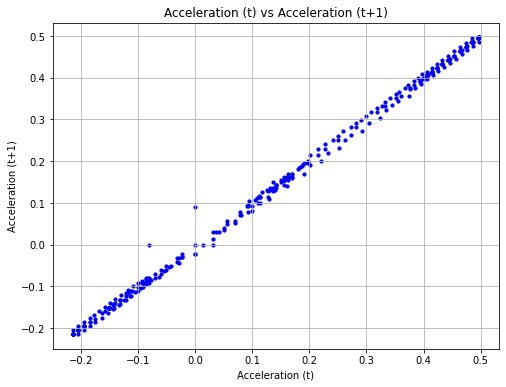

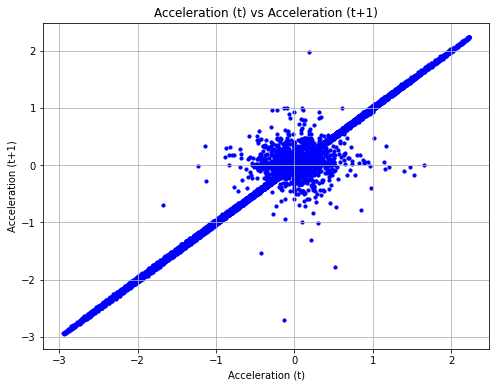

In [28]:
new_df['shifted_acceleration'] = new_df['acceleration'].shift(-1)

# Plot the image
plt.figure(figsize=(8, 6))
plt.scatter(new_df['acceleration'], new_df['shifted_acceleration'], s=10, color='blue')
plt.title('Acceleration (t) vs Acceleration (t+1)')
plt.xlabel('Acceleration (t)')
plt.ylabel('Acceleration (t+1)')
plt.grid(True)
plt.show()

# Drop the added shifted_xAcceleration column to avoid affecting the DataFrame
new_df.drop('shifted_acceleration', axis=1, inplace=True)

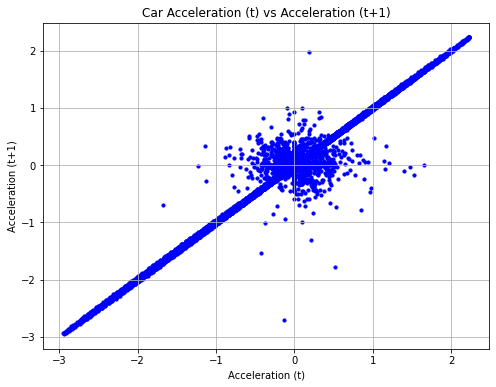

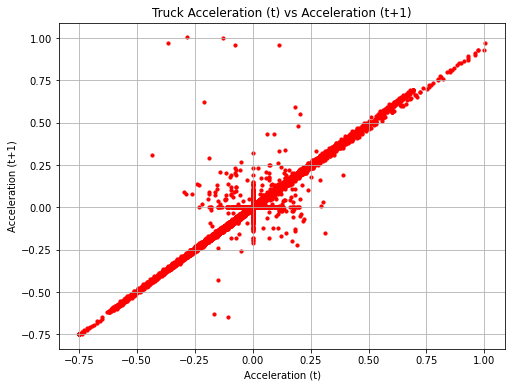

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming new_df contains the DataFrame with the desired columns

# Calculate the velocity column
new_df['velocity'] = np.sqrt(new_df['xVelocity']**2 + new_df['yVelocity']**2)

# Calculate the acceleration column
new_df['acceleration'] = np.sqrt(new_df['xAcceleration']**2 + new_df['yAcceleration']**2) * np.sign(new_df['xAcceleration'])

# Create separate DataFrames for cars and trucks
car_df = new_df[new_df['class'] == 'Car']
truck_df = new_df[new_df['class'] == 'Truck']

# Plot for cars
plt.figure(figsize=(8, 6))
plt.scatter(car_df['acceleration'], car_df['acceleration'].shift(-1), s=10, color='blue')
plt.title('Car Acceleration (t) vs Acceleration (t+1)')
plt.xlabel('Acceleration (t)')
plt.ylabel('Acceleration (t+1)')
plt.grid(True)
plt.show()

# Plot for trucks
plt.figure(figsize=(8, 6))
plt.scatter(truck_df['acceleration'], truck_df['acceleration'].shift(-1), s=10, color='red')
plt.title('Truck Acceleration (t) vs Acceleration (t+1)')
plt.xlabel('Acceleration (t)')
plt.ylabel('Acceleration (t+1)')
plt.grid(True)
plt.show()

# Drop the added columns to avoid affecting the DataFrame
new_df.drop(['velocity', 'acceleration'], axis=1, inplace=True)


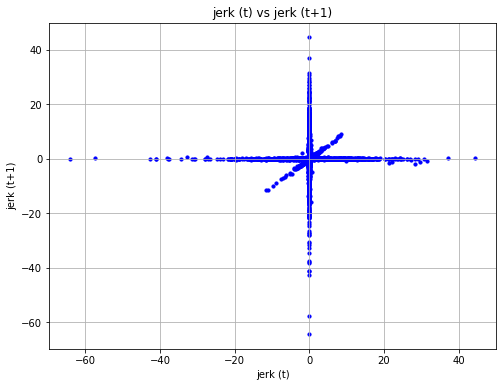

In [29]:
new_df['shifted_jerk'] = new_df['jerk'].shift(-1)

# Plot the image
plt.figure(figsize=(8, 6))
plt.scatter(new_df['jerk'], new_df['shifted_jerk'], s=10, color='blue')
plt.title('jerk (t) vs jerk (t+1)')
plt.xlabel('jerk (t)')
plt.ylabel('jerk (t+1)')
plt.grid(True)
plt.show()

# Drop the added shifted_xAcceleration column to avoid affecting the DataFrame
new_df.drop('shifted_jerk', axis=1, inplace=True)

In [8]:
new_df.head()

,id,frame,x,y,xVelocity,yVelocity,xAcceleration,yAcceleration,velocity,acceleration
0,1,1,362.26,21.68,40.85,0.00,0.30,0.0,40.850000,0.30
1,1,2,363.73,21.68,40.87,0.00,0.30,0.0,40.870000,0.30
2,1,3,365.27,21.68,40.88,0.00,0.31,0.0,40.880000,0.31
3,1,4,366.83,21.68,40.89,0.00,0.32,0.0,40.890000,0.32
4,1,5,368.42,21.68,40.90,0.01,0.32,0.0,40.900001,0.32
